# DSC 680 - Project 1 - Wildfire Prediction Modeling
## Ashley Deibler

## Exploratory Data Analysis (EDA)


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Data Cleaning
df = pd.read_csv('C:/Users/diggy/DSC680-Deibler/fire_data.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [6]:
# Drop Year Features
df1  = df.drop(['day','month','year'], axis=1)
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [7]:
# Encode Classes
## Not fire = 0
## Fire = 1

df1['Classes']=np.where(df1['Classes']=='not fire', 0, 1)
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


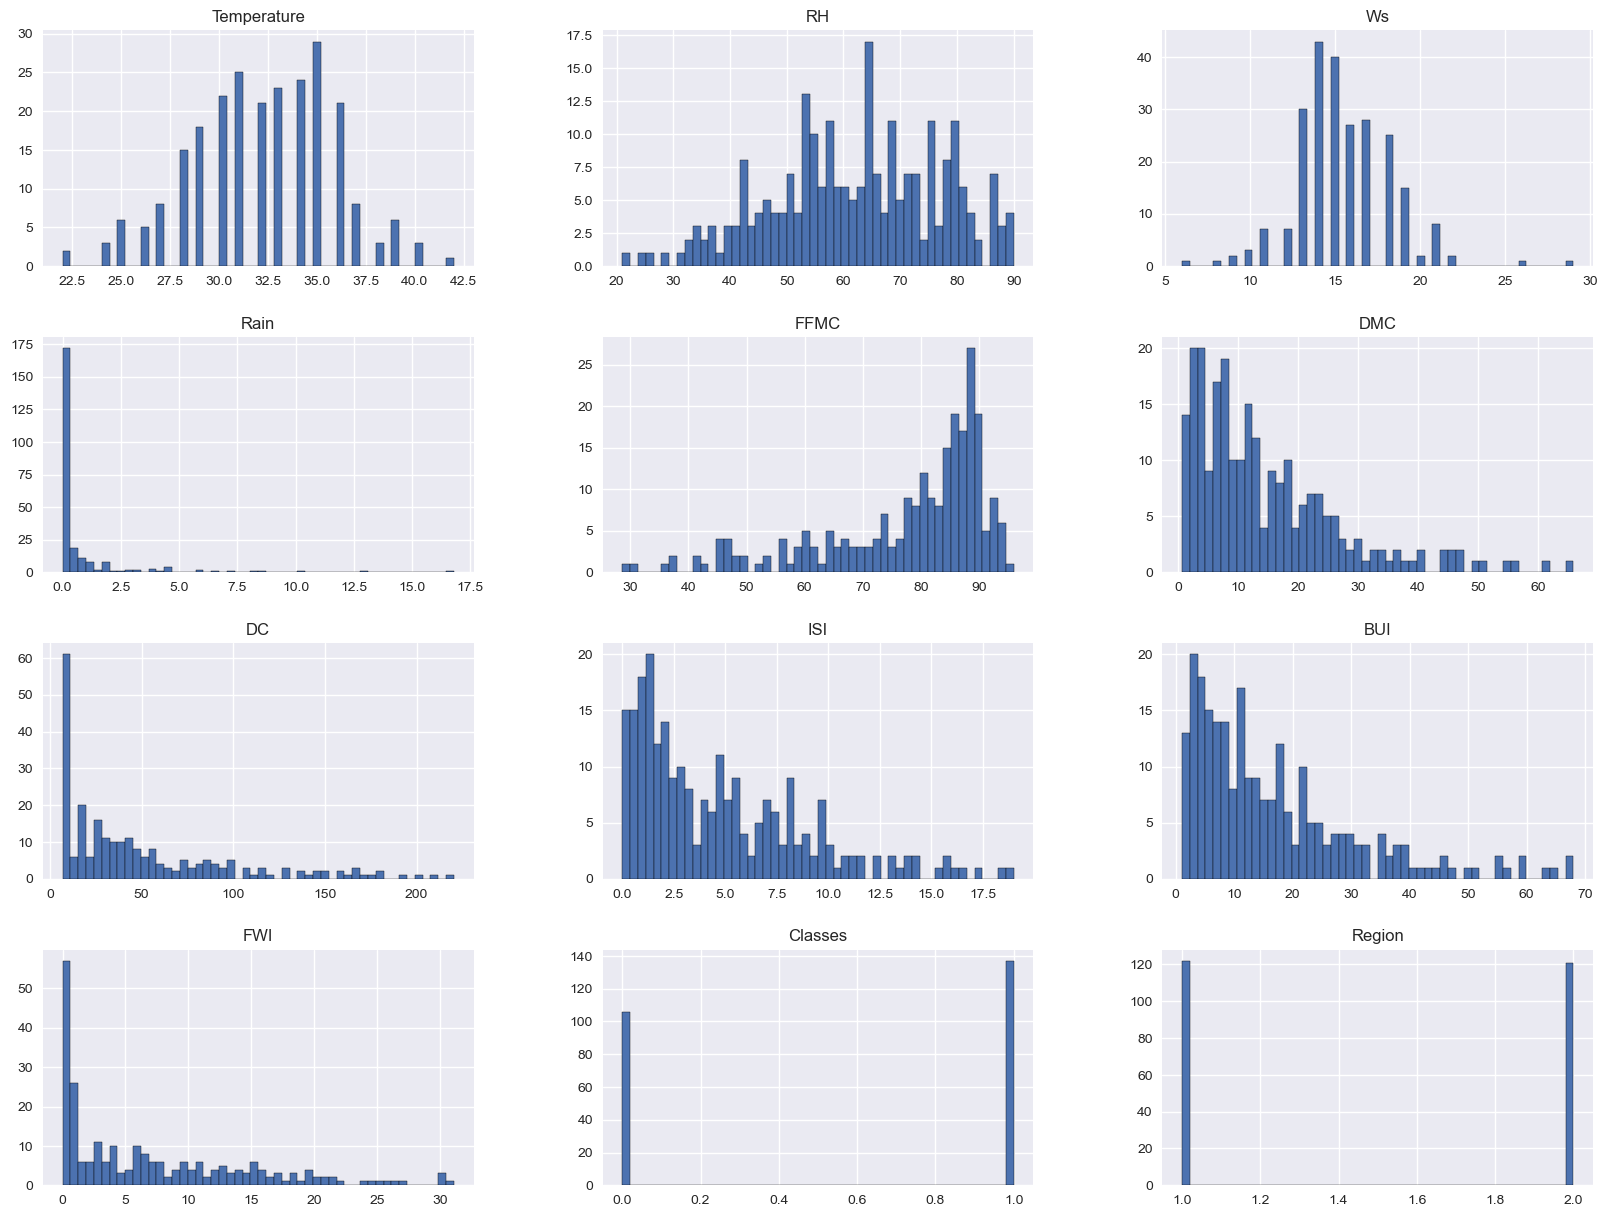

In [8]:
## Visualization of Distribution
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec='black')
plt.show()

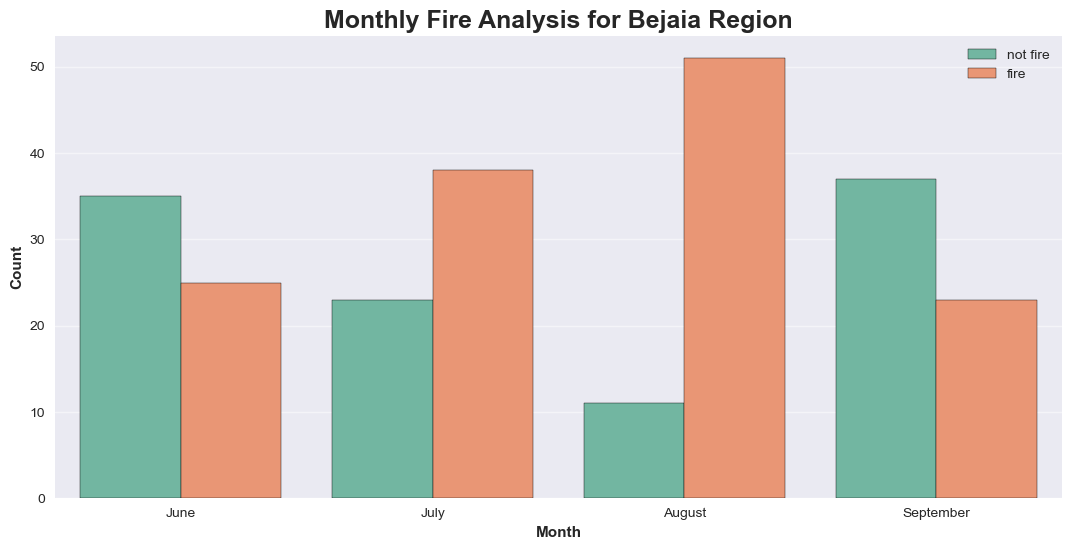

In [10]:
# Monthly Fire Analysis - Bejaia

dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data = df,ec = 'black', palette='Set2')
plt.title('Monthly Fire Analysis for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Month', weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.grid(alpha=0.5, axis='y')
plt.show()

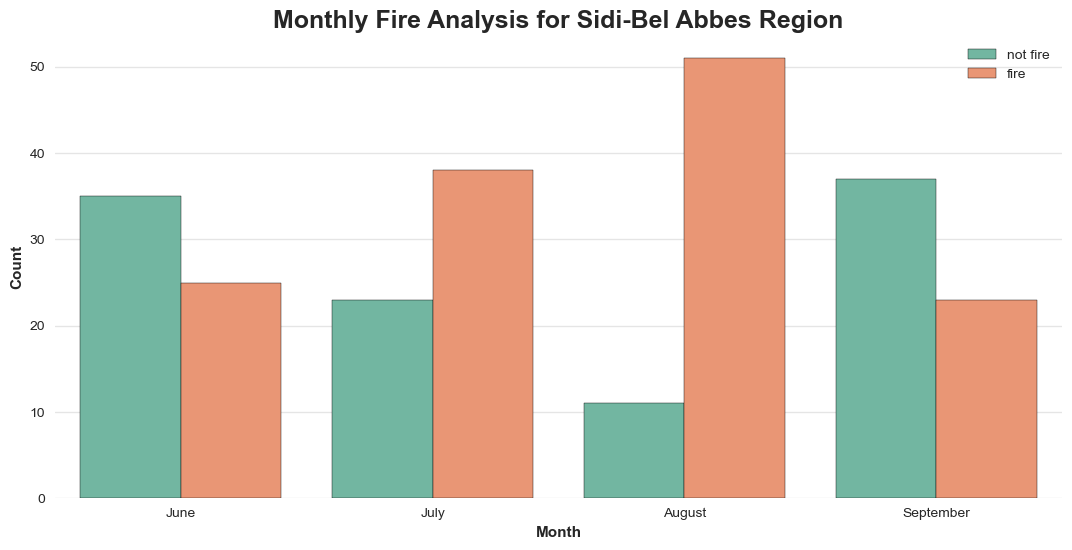

In [11]:
# Montly Fire Analysis - Sidi-Bel Abbes Region
dftemp = df.loc[df['Region']==2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data = df, ec='black', palette='Set2')
plt.title('Monthly Fire Analysis for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Month', weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September',])
plt.grid(alpha=0.5, axis='y')
plt.show()

In [12]:
# define barchart
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature = df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y='Classes', data = by_feature[[feature, 'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

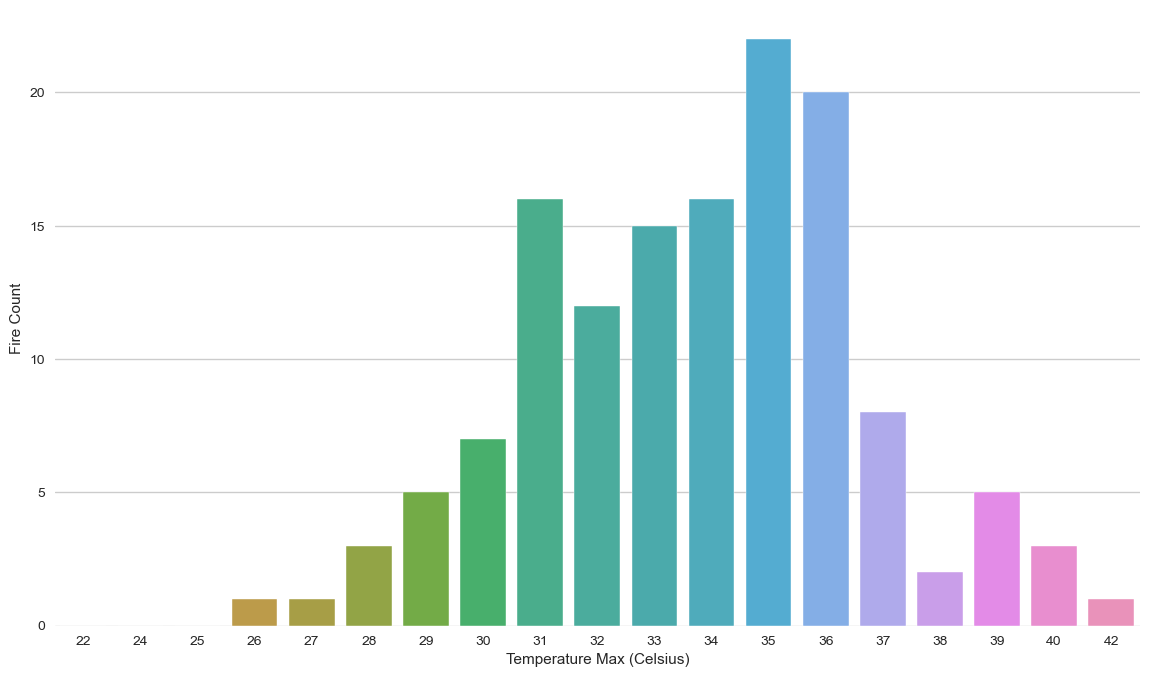

In [13]:
# Temperature Analysis
barchart('Temperature', 'Temperature Max (Celsius)')

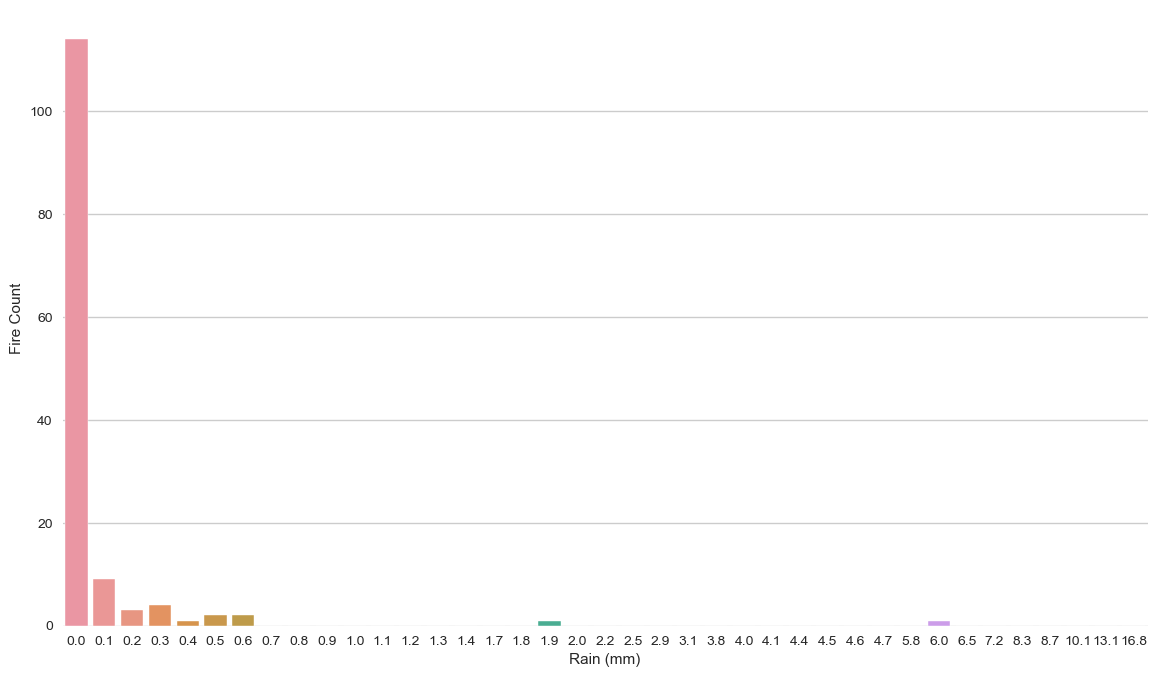

In [14]:
# Precipitation Analysis
barchart('Rain', 'Rain (mm)')

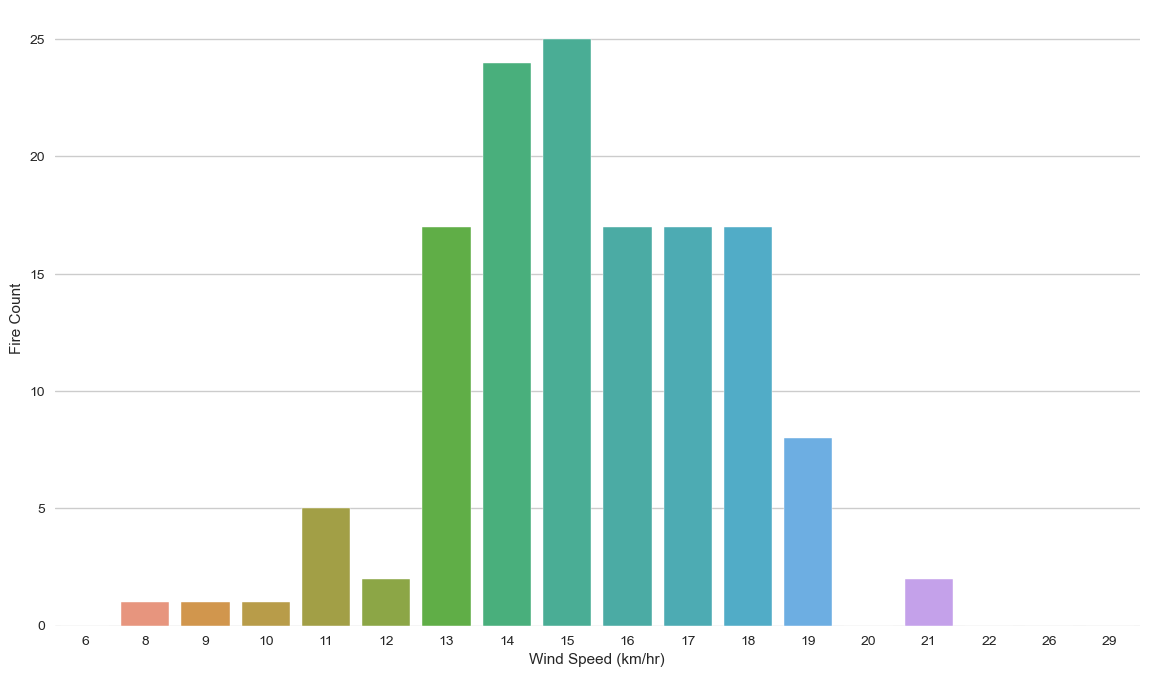

In [15]:
# Wind Speed Analysis
barchart('Ws', 'Wind Speed (km/hr)')

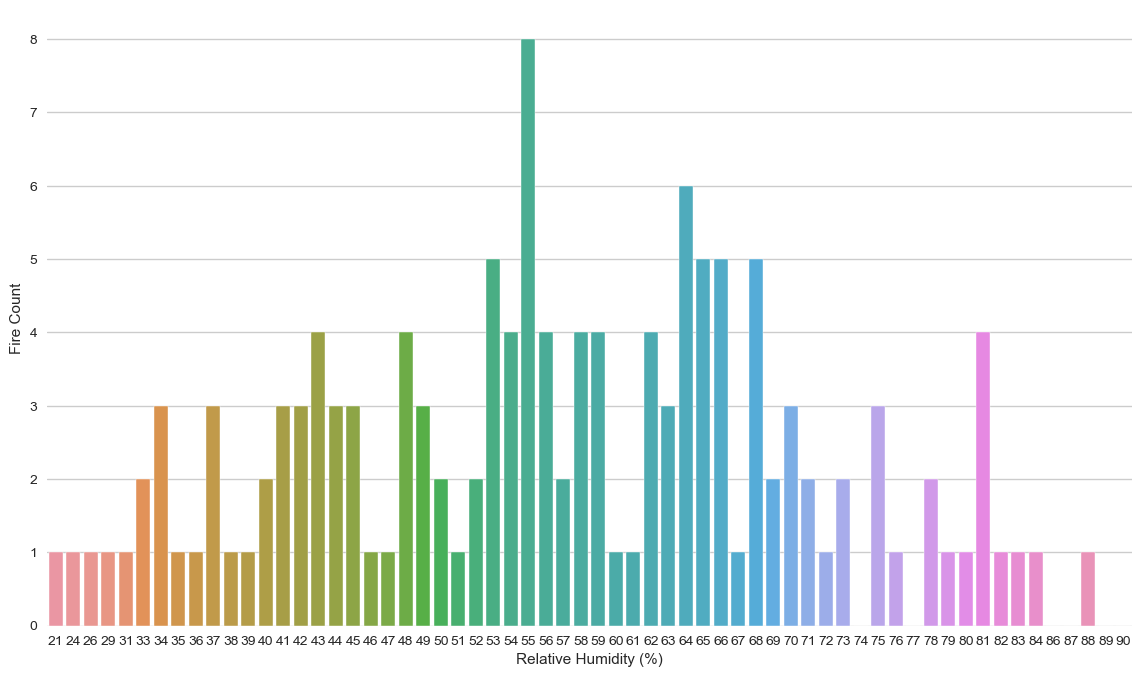

In [16]:
# Humidity Analysis
barchart('RH', 'Relative Humidity (%)')

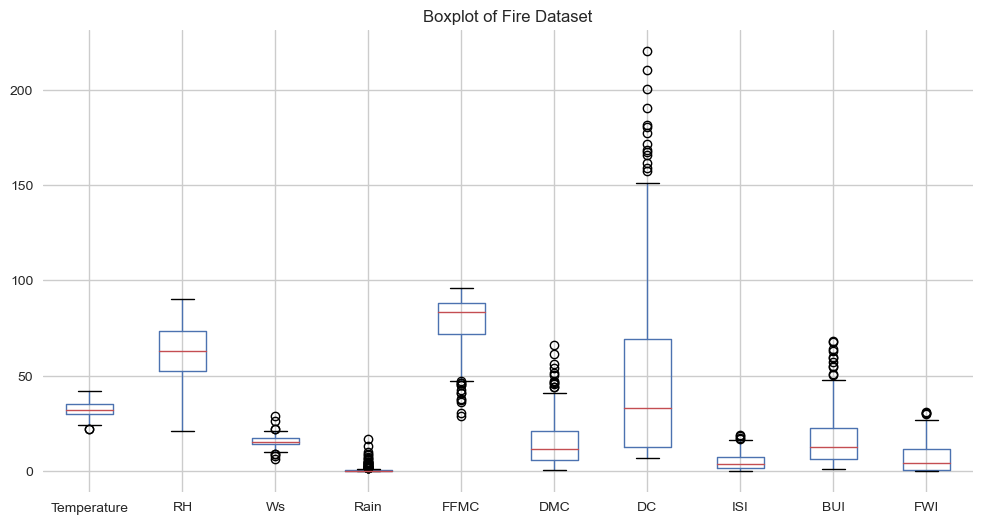

In [17]:
dftemp=df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize = (12,6))
ax = dftemp.boxplot()
ax.set_title('Boxplot of Fire Dataset')
plt.show()

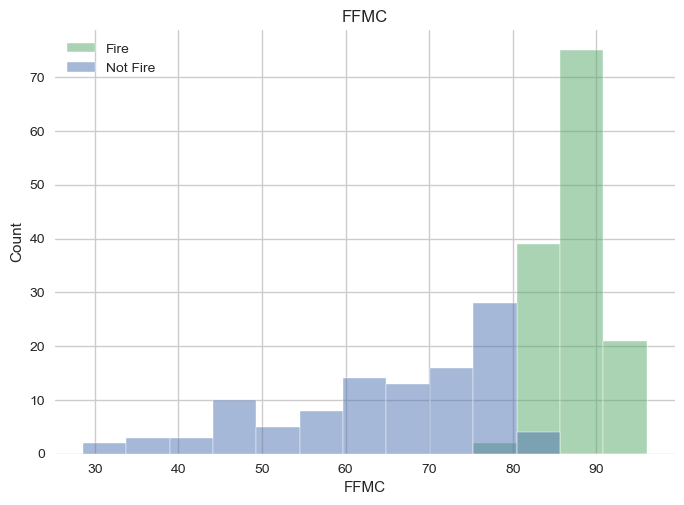

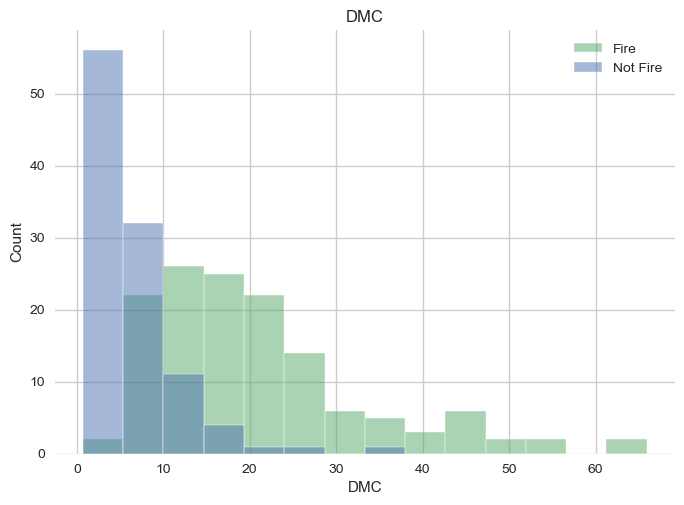

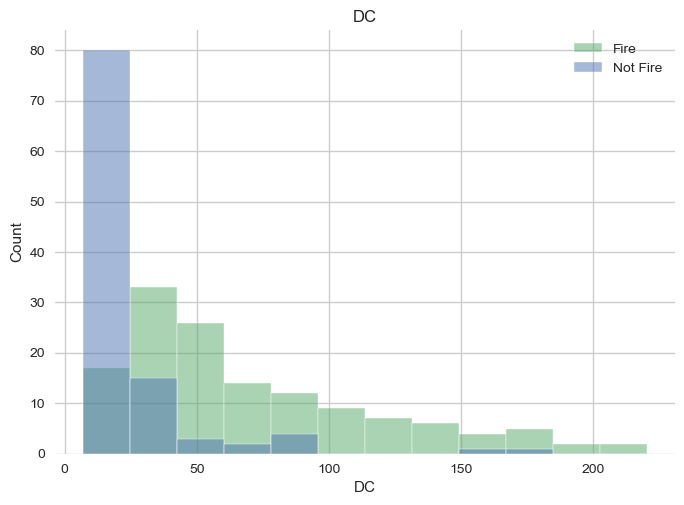

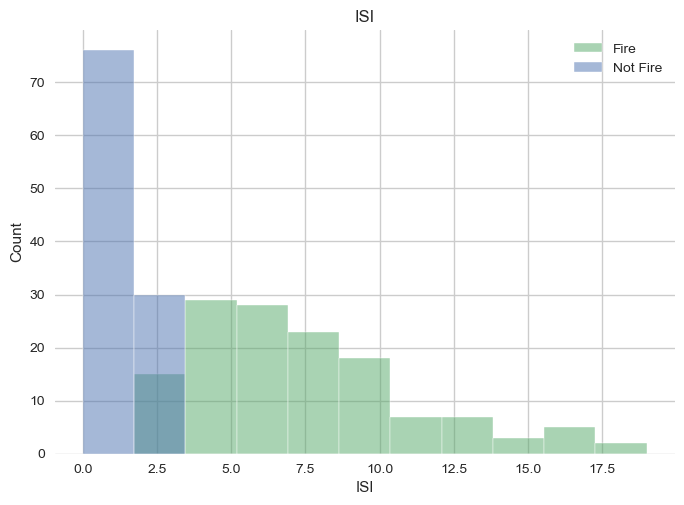

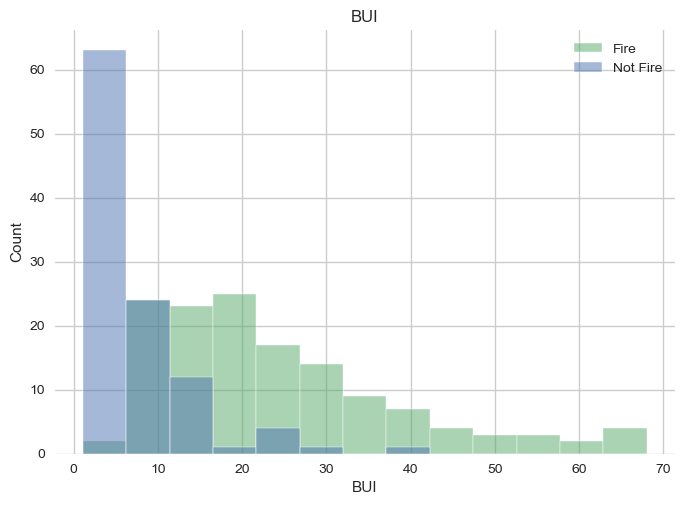

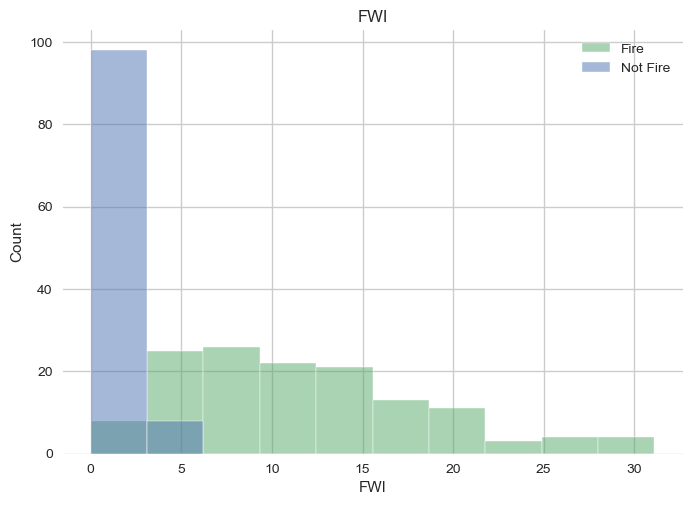

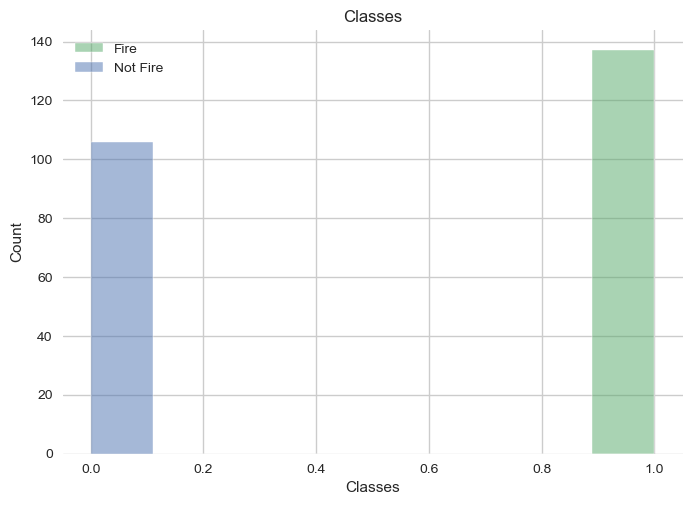

In [18]:
dftemp = df1.drop(['Region', 'Temperature', 'Rain', 'Ws', 'RH'], axis=1)
for feature in dftemp:
    sns.histplot(data=dftemp, x = feature, hue='Classes')
    plt.legend(labels=['Fire', 'Not Fire'])
    plt.title(feature)
    plt.show()

### EDA Report:
- Temperature: Highest fire counts happen between 30-37 C. 
- Rain: Highest fire counts happen where there is no rain or less rain. 
- Wind Speed: Highest fire counts happen when wind speed is between 13-19 km/hr. 
- Humidity: Highest fire counts happen when humidity is 50-80% 

- FFMC Index over 75 increases chance of forest fire. 
- DMC Index between 10-30 DMC have higest evidence of fires
- DC Index above 25 have higher chance for forest fires. 
- ISI Index above 3 has higher chance for forest fire. 
- BUI Index above 10 has higher chance for forest fire.
- FWI Index between 3-25 have higher chance for forest fire. 

# Classification Data Preprocessing

In [38]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
X = df1.drop('Classes', axis=1)
y = df1['Classes']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

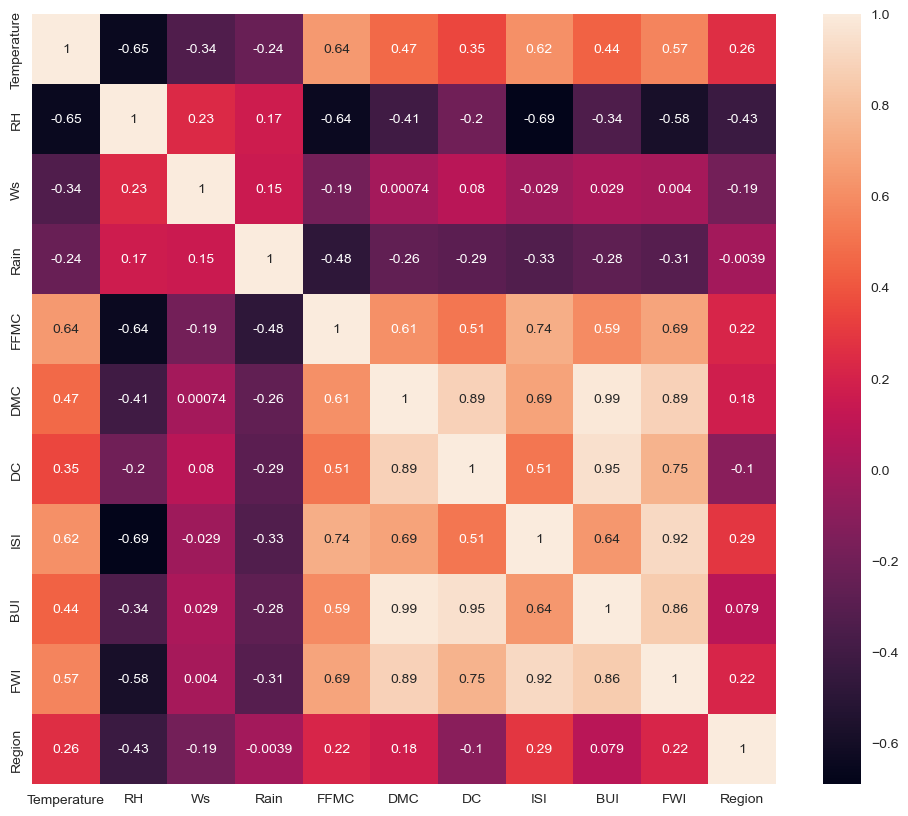

In [29]:
# Use Pearson Correlation

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [31]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X_train, 0.75)

In [33]:
corr_features

{'BUI', 'DC', 'FWI'}

In [34]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

In [40]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [41]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

# Model 1: Decision Tree Classifier

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [44]:
## Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test, dtc_pred)
cr = classification_report(y_test, dtc_pred)

print('Decision Tree')
print('Accuracy Score Value: {:.4f}'.format(score))
print(cr)

Decision Tree
Accuracy Score Value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



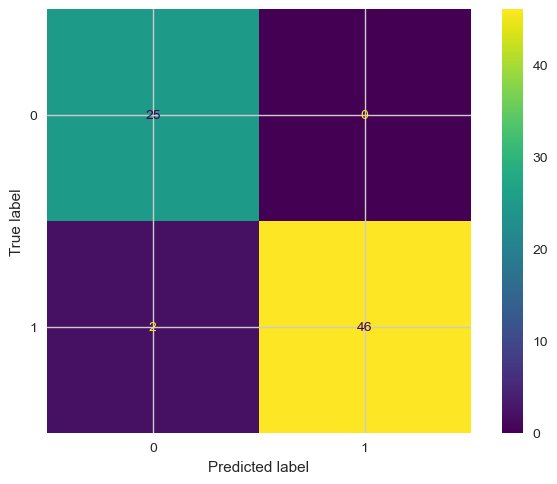

In [45]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

In [48]:
# Feature Selection
feature_importance_dtc = dtc.feature_importances_
importance_df_dtc = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_dtc
}).sort_values('Importance', ascending=False)
importance_df_dtc

,Feature,Importance
4,FFMC,0.924697
6,ISI,0.043861
5,DMC,0.018865
0,Temperature,0.012577
1,RH,0.000000
2,Ws,0.000000
3,Rain,0.000000
7,Region,0.000000


In [50]:
# Model Deployment
Xtrain_new_dtc = X_train.drop(['Rain', 'RH', 'DMC', 'Region'], axis=1)
Xtest_new_dtc = X_test.drop(['Rain', 'RH', 'DMC', 'Region'], axis=1)

In [51]:
Xtrain_new_scaled_dtc, Xtest_new_scaled_dtc = scaler_standard(Xtrain_new_dtc, Xtest_new_dtc)

In [52]:
dtc_model = dtc.fit(Xtrain_new_scaled_dtc, y_train)
dtc_model.score(Xtest_new_scaled_dtc, y_test)
dtc_model_pred = dtc_model.predict(Xtest_new_scaled_dtc)
cr = classification_report(y_test, dtc_model_pred)
print('Final Model Decision Tree')
print('Accuracy Score Value: {:.4f}'.format(score))
print(cr)

Final Model Decision Tree
Accuracy Score Value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



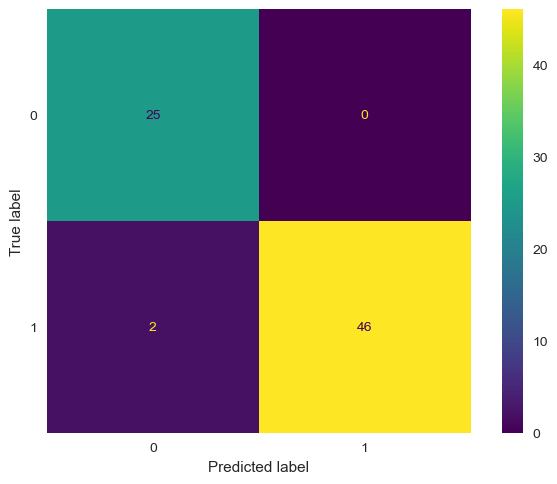

In [78]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc_model, Xtest_new_scaled_dtc, y_test)

## Visualization of Decision Tree Classifier

In [53]:
Xtrain_new_dtc

,Temperature,Ws,FFMC,ISI
104,25,21,40.9,0.1
222,29,15,59.5,0.8
125,30,14,79.4,2.2
131,30,15,89.4,8.4
102,30,21,58.5,1.1
...,...,...,...,...
161,34,16,77.5,2.0
168,33,15,86.1,5.2
158,38,13,85.0,4.1
98,31,17,69.6,1.5


In [54]:
y_train

104    0
222    0
125    0
131    1
102    0
      ..
161    0
168    1
158    1
98     0
133    1
Name: Classes, Length: 170, dtype: int32

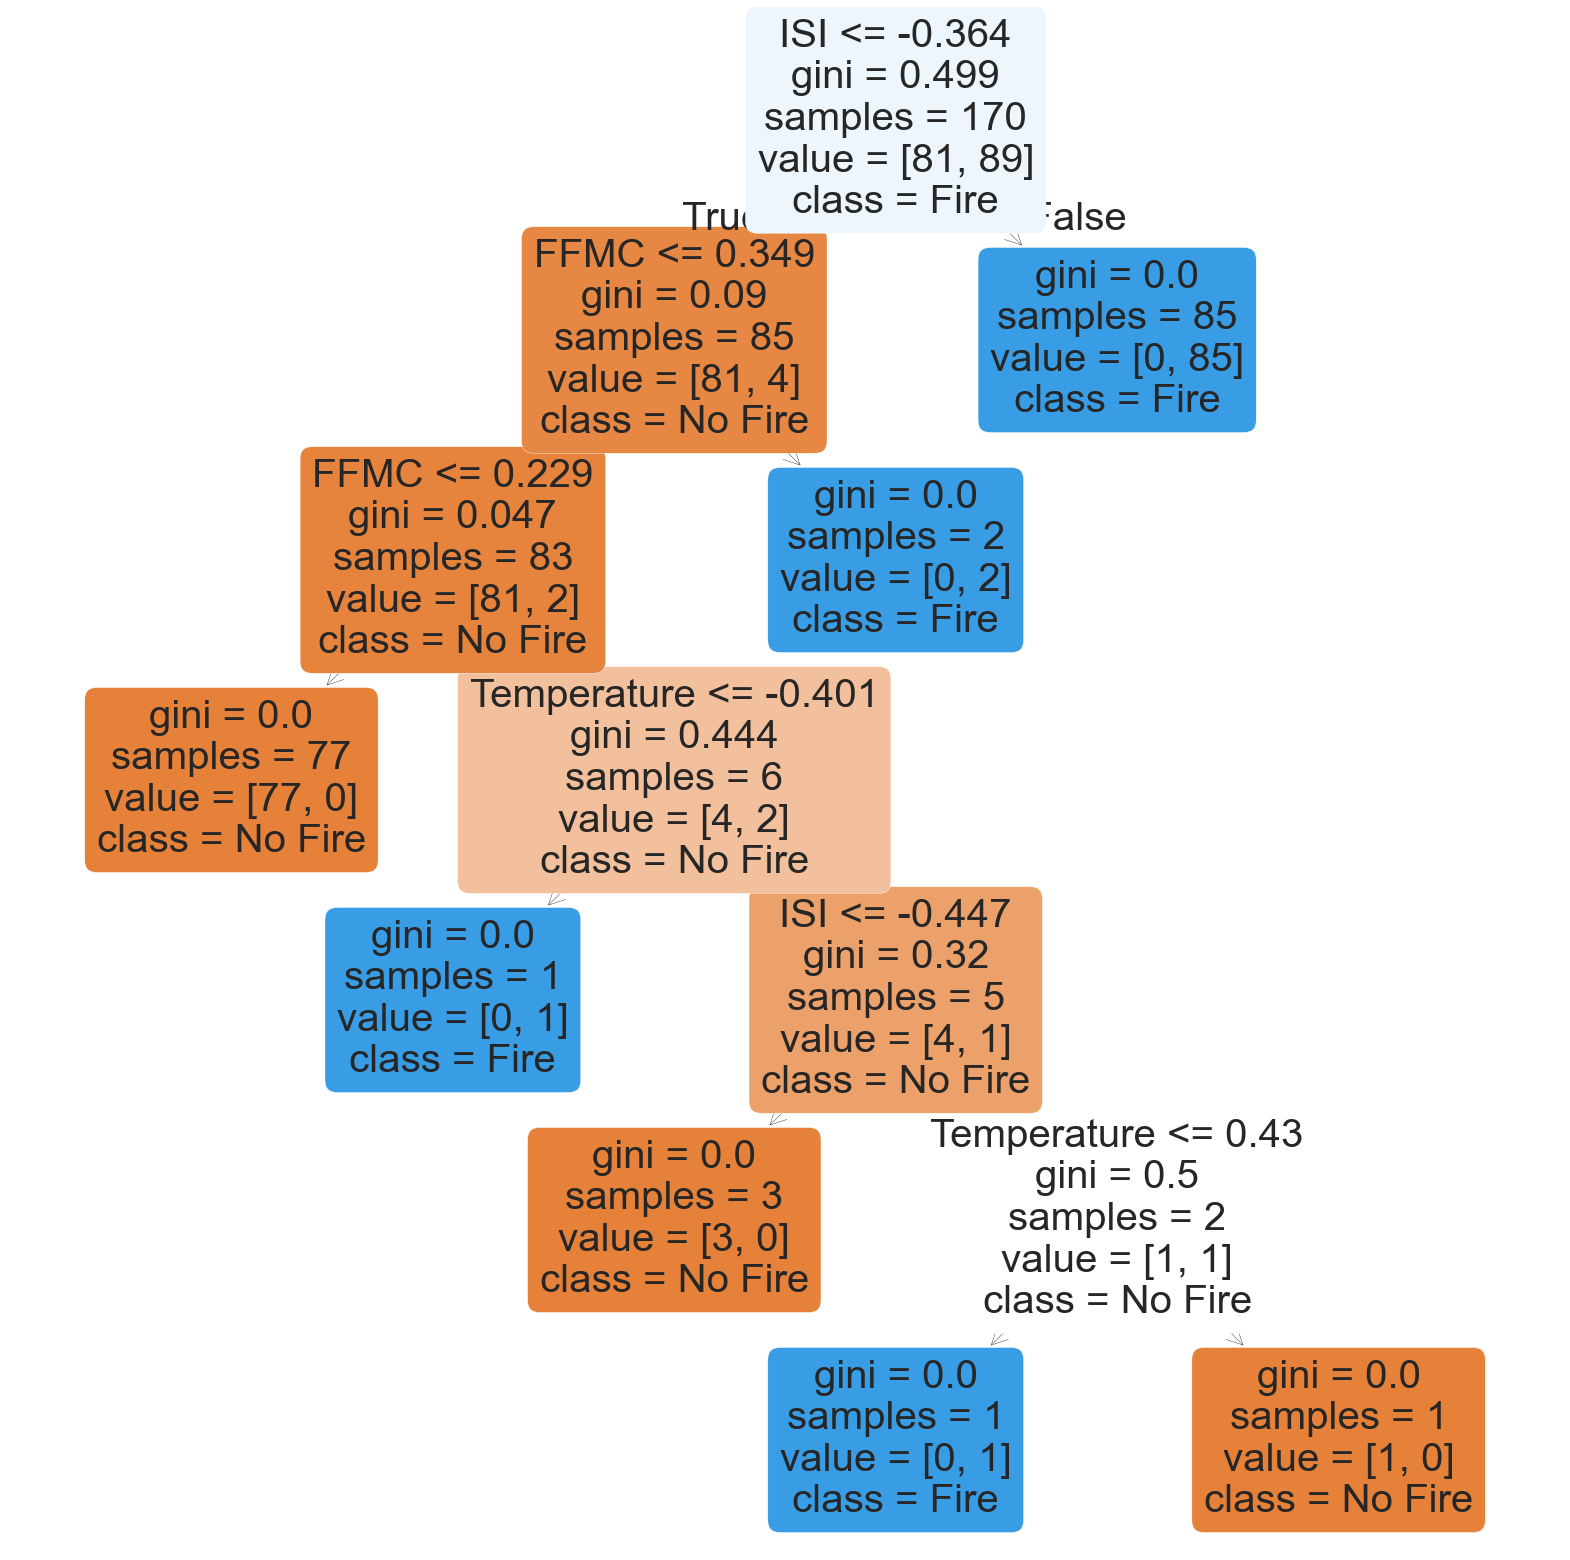

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dtc_model,
         feature_names = Xtrain_new_dtc.columns,
         class_names = ['No Fire', 'Fire'], 
         filled=True, rounded = True)

plt.show()

# Model 2: Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Random Forest Regressor')
print('R2 Score Value: {:.4f}'.format(r2))
print('Mean Absolute Value: {:.4f}'.format(mae))

Random Forest Regressor
R2 Score Value: 0.8916
Mean Absolute Value: 0.0300


In [63]:
# Hypertune Random Forest Regressor

param_grid = [{'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 3, 4],
              'min_samples_split': [2, 6, 10],
              'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg, param_grid, cv = 10, verbose = 2, n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [64]:
best_random_grid = Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

print('Random Forest Tuned')
print('R2 Score Value: {:.4f}'.format(r2))
print('MAE Value: {:.4f}'.format(mae))

Random Forest Tuned
R2 Score Value: 0.9041
MAE Value: 0.0522


In [65]:
# Feature Removal for Random Forest Regressor

feature_importance = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importance,
}).sort_values('Importance', ascending = False)
importance_df

,Feature,Importance
6,ISI,0.419785
4,FFMC,0.306176
5,DMC,0.150564
3,Rain,0.071892
1,RH,0.022578
0,Temperature,0.017695
2,Ws,0.008507
7,Region,0.002803


Text(0, 0.5, 'Features')

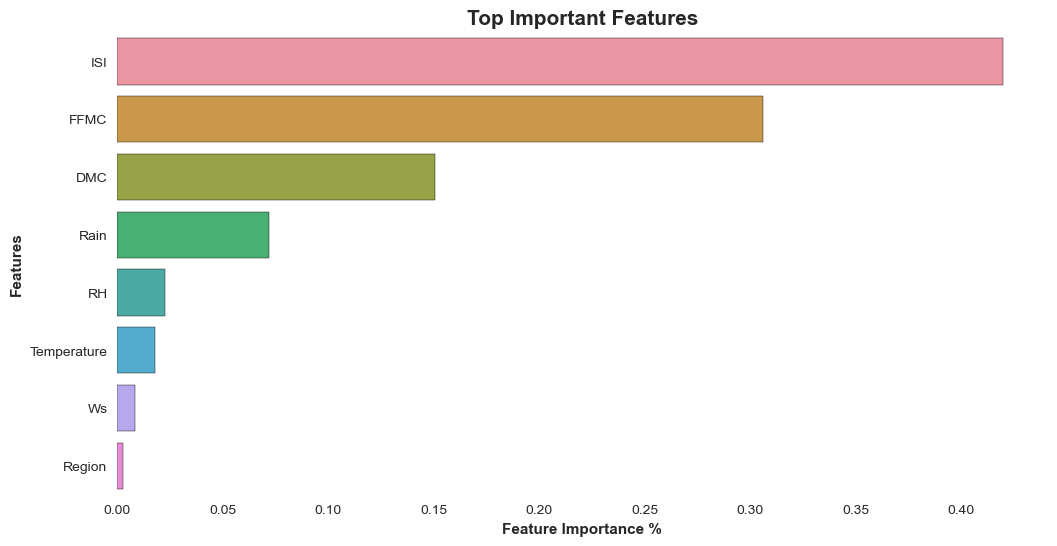

In [66]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data = importance_df, x = 'Importance', y = 'Feature', ec = 'black')
ax.set_title('Top Important Features', weight = 'bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight = 'bold')
ax.set_ylabel('Features', weight = 'bold')

In [67]:
# Model for Deployment

Xtrain_new = X_train.drop(['Temperature', 'Ws', 'RH', 'Region'], axis=1)
Xtest_new = X_test.drop(['Temperature', 'Ws', 'RH', 'Region'], axis = 1)

In [68]:
Xtrain_new.columns

Index(['Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [69]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [70]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

print('Random Forest Tuned')
print('R2 Score Value: {:.4f}'.format(r2))
print('MAE Value: {:.4f}'.format(mae))

Random Forest Tuned
R2 Score Value: 0.8847
MAE Value: 0.0405
